In [55]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [56]:
df = pd.read_csv('data.csv')
df

,SALE_DT,STORE,SALES
0,2019-01-01 00:00:00.000,Store_a,0.00
1,2019-01-02 00:00:00.000,Store_a,16553359.58
2,2019-01-03 00:00:00.000,Store_a,17956624.58
3,2019-01-04 00:00:00.000,Store_a,19440652.23
4,2019-01-05 00:00:00.000,Store_a,20677704.73
...,...,...,...
1272,2022-06-26 00:00:00.000,Store_a,17243093.78
1273,2022-06-27 00:00:00.000,Store_a,13538082.87
1274,2022-06-28 00:00:00.000,Store_a,13565274.83
1275,2022-06-29 00:00:00.000,Store_a,14959597.22


In [57]:
df['SALE_DT'].min()

'2019-01-01 00:00:00.000'

In [59]:
df['SALE_DT'].max()

'2022-06-30 00:00:00.000'

## Подготовка данных
Следующие шаги включают удаление ненужных столбцов, проверку отсутствующих значений, агрегирование продаж по дате и т. д.

In [60]:
df.isnull().sum()

SALE_DT    0
STORE      0
SALES      0
dtype: int64

In [61]:
df = df.drop('STORE', axis=1)

In [62]:
df.columns = ['Order Date', 'Sales']
df.head()

,Order Date,Sales
0,2019-01-01 00:00:00.000,0.00
1,2019-01-02 00:00:00.000,16553359.58
2,2019-01-03 00:00:00.000,17956624.58
3,2019-01-04 00:00:00.000,19440652.23
4,2019-01-05 00:00:00.000,20677704.73


In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Sales
0,2019-01-01,0.00
1,2019-01-02,16553359.58
2,2019-01-03,17956624.58
3,2019-01-04,19440652.23
4,2019-01-05,20677704.73


In [64]:
df.set_index('Order Date', inplace=True)

In [65]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Order Date', length=1277, freq=None)

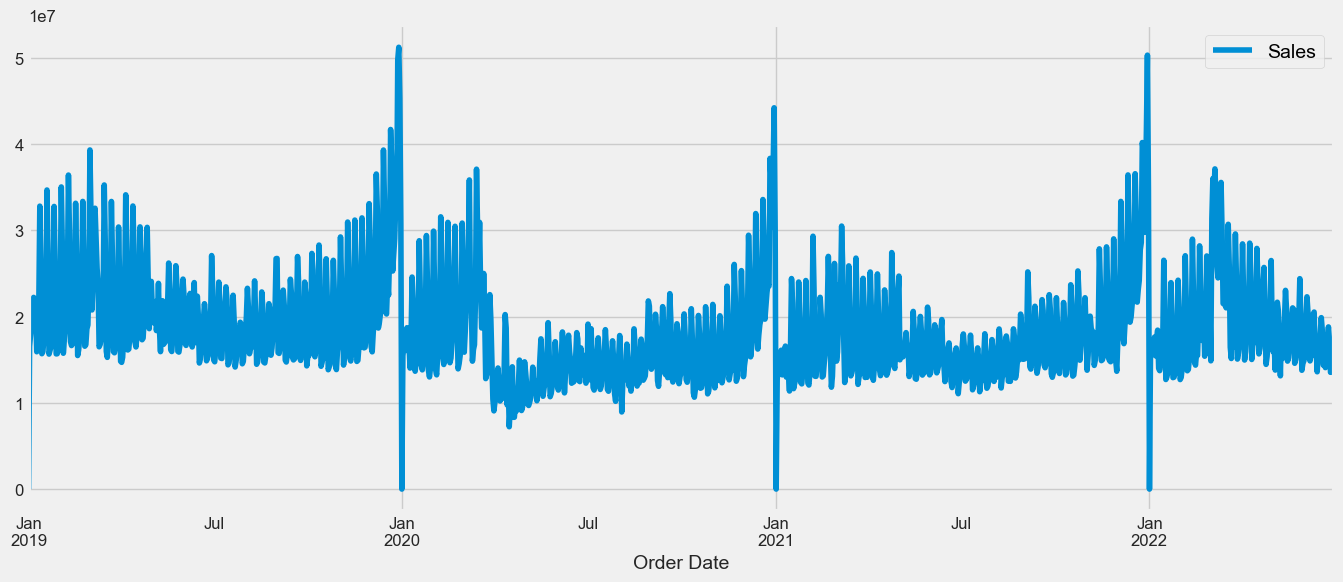

In [66]:
df.plot(figsize=(15, 6))
plt.show()

## График данных по ДНЯМ

## Поскольку текущие данные даты и времени кажутся сложными для работы, поэтому вместо этого мы будем использовать среднее дневное значение продаж за месяц и использовать начало каждого месяца в качестве метки времени.

In [67]:
y = df['Sales'].resample('MS').mean()

In [68]:
y['2019':]

Order Date
2019-01-01    1.973128e+07
2019-02-01    2.233876e+07
2019-03-01    2.347952e+07
2019-04-01    2.166364e+07
2019-05-01    1.973562e+07
2019-06-01    1.916912e+07
2019-07-01    1.777922e+07
2019-08-01    1.853495e+07
2019-09-01    1.865511e+07
2019-10-01    1.850230e+07
2019-11-01    2.090278e+07
2019-12-01    2.869032e+07
2020-01-01    1.720124e+07
2020-02-01    2.022306e+07
2020-03-01    2.112407e+07
2020-04-01    1.173202e+07
2020-05-01    1.293979e+07
2020-06-01    1.435079e+07
2020-07-01    1.423821e+07
2020-08-01    1.461408e+07
2020-09-01    1.559590e+07
2020-10-01    1.489487e+07
2020-11-01    1.640297e+07
2020-12-01    2.435537e+07
2021-01-01    1.501108e+07
2021-02-01    1.742063e+07
2021-03-01    1.781114e+07
2021-04-01    1.757332e+07
2021-05-01    1.628613e+07
2021-06-01    1.490534e+07
2021-07-01    1.438576e+07
2021-08-01    1.535571e+07
2021-09-01    1.686952e+07
2021-10-01    1.753253e+07
2021-11-01    1.833539e+07
2021-12-01    2.767615e+07
2022-01-01    1.6

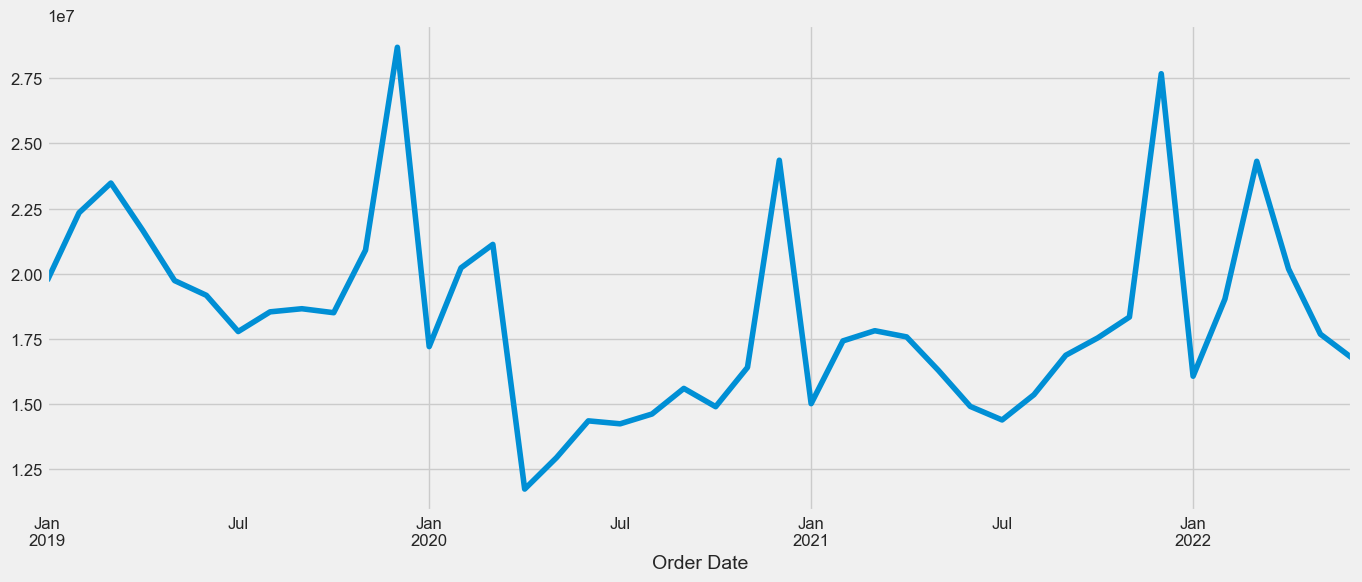

In [16]:
y.plot(figsize=(15, 6))
plt.show()

## Приведенный выше временной ряд показывает некоторую сезонную закономерность, например, продажи всегда низкие в начале года и высокие в конце года.

Мы также можем визуализировать наши данные, используя декомпозицию временных рядов; что позволяет нам разложить наш временной ряд на три отдельных компонента: тренд, сезонность и шум.

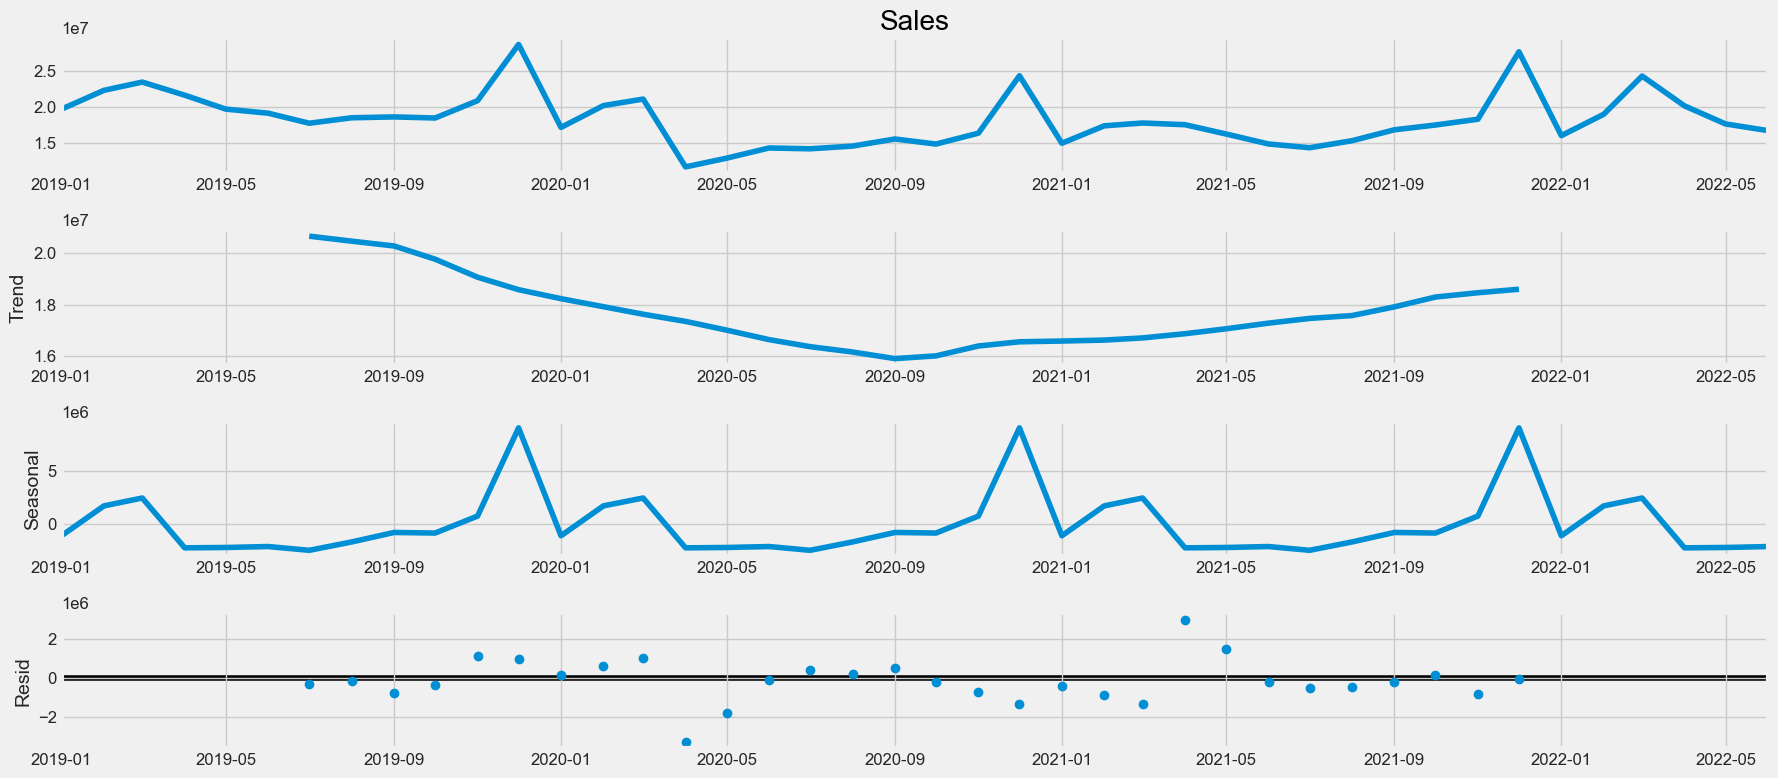

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Прогнозирование временных рядов с использованием ARIMA
Выбор параметров для модели ARIMA

In [99]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


print('Примеры комбинаций параметров для Seasonal ARIMA...')
print(f'SARIMAX: ({pdq[1]}, {seasonal_pdq[1]})')
print(f'SARIMAX: ({pdq[1]}, {seasonal_pdq[2]})')
print(f'SARIMAX: ({pdq[2]}, {seasonal_pdq[3]})')
print(f'SARIMAX: ({pdq[2]}, {seasonal_pdq[4]})')

Примеры комбинаций параметров для Seasonal ARIMA...
SARIMAX: ((0, 0, 1), (0, 0, 1, 12))
SARIMAX: ((0, 0, 1), (0, 1, 0, 12))
SARIMAX: ((0, 1, 0), (0, 1, 1, 12))
SARIMAX: ((0, 1, 0), (1, 0, 0, 12))


In [100]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print(f'ARIMA {param} x {param_seasonal} 12 - AIC:{results.aic}')
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) 12 - AIC:1491.20949576751
ARIMA (0, 0, 0) x (0, 0, 1, 12) 12 - AIC:5182509648.141915
ARIMA (0, 0, 0) x (0, 1, 0, 12) 12 - AIC:965.0905949184857
ARIMA (0, 0, 0) x (0, 1, 1, 12) 12 - AIC:558.2792925878063
ARIMA (0, 0, 0) x (1, 0, 0, 12) 12 - AIC:994.3006141599959
ARIMA (0, 0, 0) x (1, 0, 1, 12) 12 - AIC:941.1375383512434
ARIMA (0, 0, 0) x (1, 1, 0, 12) 12 - AIC:585.8321176555968
ARIMA (0, 0, 0) x (1, 1, 1, 12) 12 - AIC:558.0564384547105
ARIMA (0, 0, 1) x (0, 0, 0, 12) 12 - AIC:1430.0133894355179
ARIMA (0, 0, 1) x (0, 0, 1, 12) 12 - AIC:4683489171.948633
ARIMA (0, 0, 1) x (0, 1, 0, 12) 12 - AIC:917.9122777683723
ARIMA (0, 0, 1) x (0, 1, 1, 12) 12 - AIC:523.2458819443282
ARIMA (0, 0, 1) x (1, 0, 0, 12) 12 - AIC:1065.4338487675923
ARIMA (0, 0, 1) x (1, 0, 1, 12) 12 - AIC:996.2401509691359
ARIMA (0, 0, 1) x (1, 1, 0, 12) 12 - AIC:586.860982638309
ARIMA (0, 0, 1) x (1, 1, 1, 12) 12 - AIC:522.5769083607507
ARIMA (0, 1, 0) x (0, 0, 0, 12) 12 - AIC:1338.7127683578

In [122]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0938      1.161      0.081      0.936      -2.181       2.369
ma.L1         -0.1672      1.152     -0.145      0.885      -2.425       2.091
ar.S.L12      -0.2048      0.548     -0.374      0.708      -1.278       0.869
ma.S.L12       0.0541      0.580      0.093      0.926      -1.082       1.191
sigma2      5.766e+12    2.2e-12   2.62e+24      0.000    5.77e+12    5.77e+12


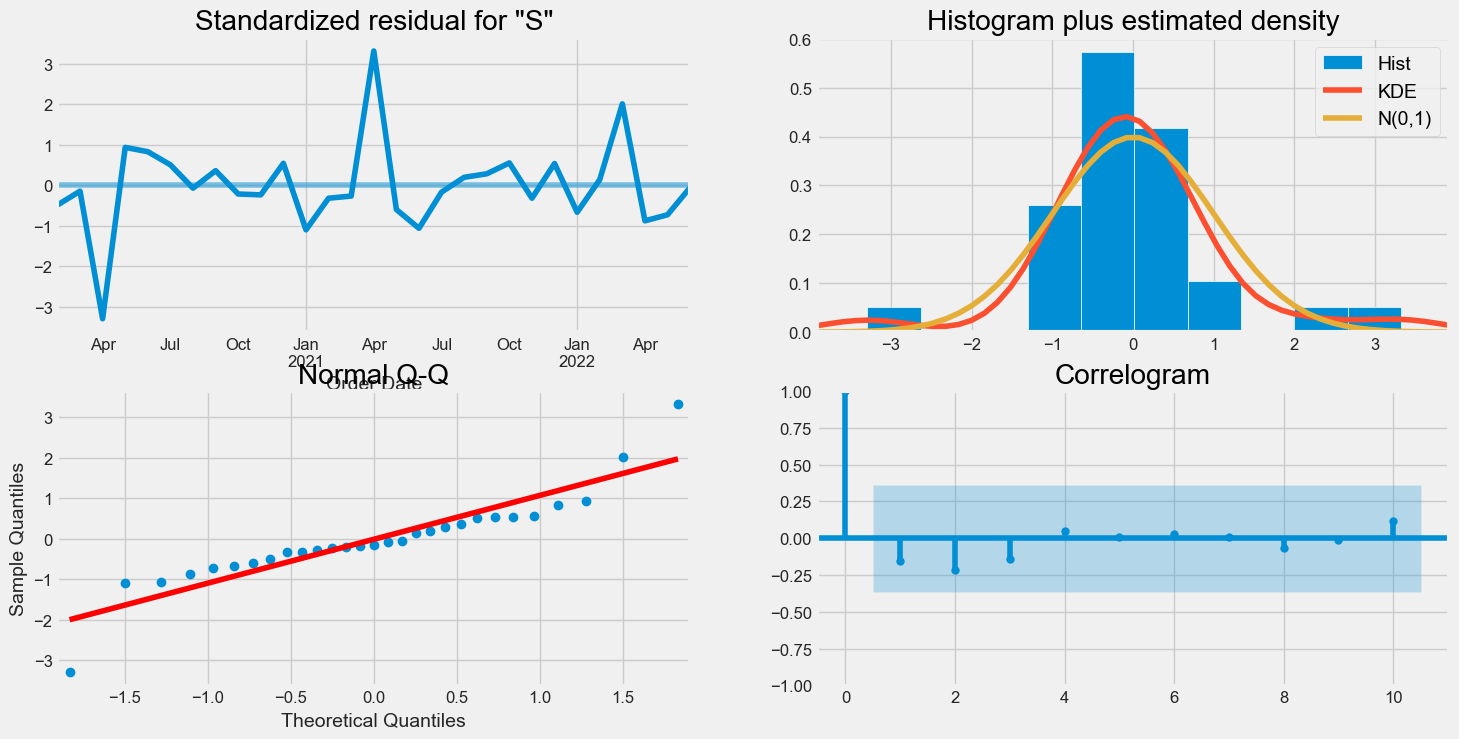

In [123]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Проверка
Чтобы определить точность прогноза, ниже приведен метод сравнения прогнозируемых продаж с реальными продажами временного ряда, а рассматриваемая дата начала — с 01.01.2021 до конца данных.

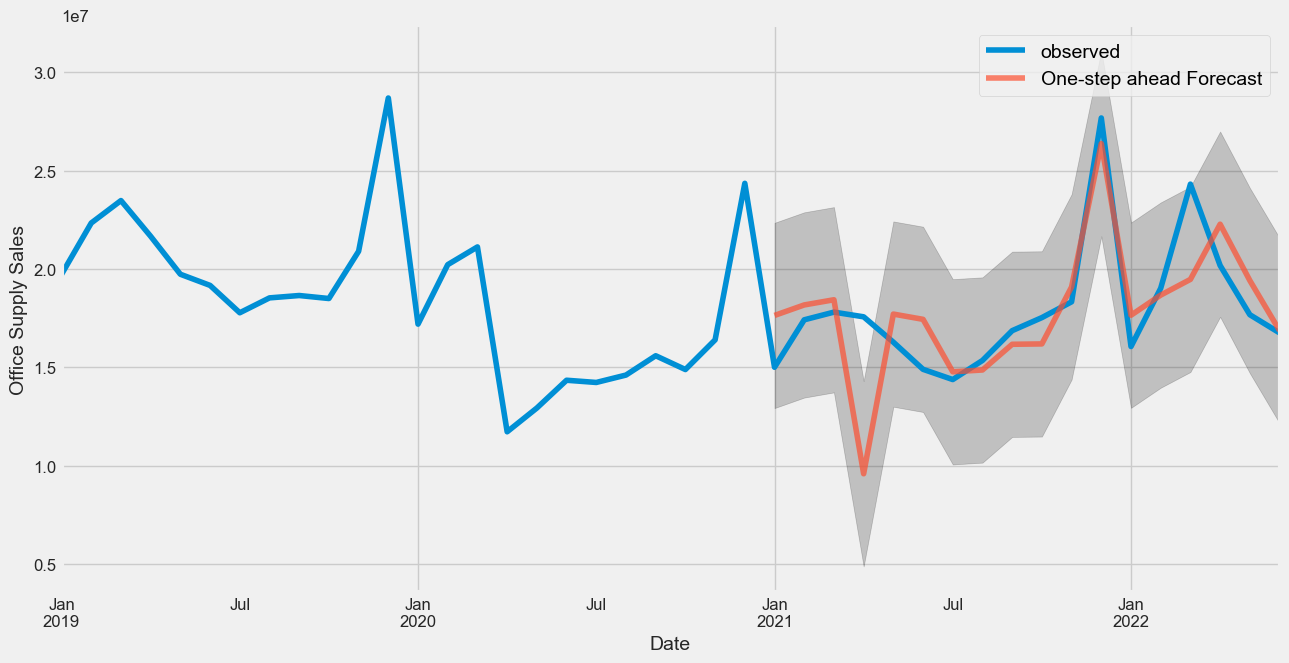

In [124]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supply Sales')
plt.legend()

plt.show()

## Линейный график показывает наблюдаемые значения по сравнению с прогнозами скользящего прогноза. В целом прогнозы достаточно хорошо согласуются с реальными значениями, демонстрируя тенденцию к росту с начала года.

In [125]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print(f'Среднеквадратическая ошибка наших прогнозов равна {round(mse, 2)}')

Среднеквадратическая ошибка наших прогнозов равна 6576544559362.84


In [126]:
print(f'Среднеквадратическая ошибка наших прогнозов равна = {round(np.sqrt(mse), 2)}')

Среднеквадратическая ошибка наших прогнозов равна = 2564477.44


## СРЕДНЕКВАДРАТИЧЕСКАЯ ОШИБКА (MSE) оценщика измеряет среднее квадратов ошибок, то есть среднеквадратичную разницу между оценочными значениями и тем, что оценивается. MSE — это мера качества оценки: она всегда неотрицательна, и чем меньше MSE, тем ближе мы к нахождению линии наилучшего соответствия.

## ROOT MEAN SQAURE ERROR (RMSE) говорит о том, что модель способна прогнозировать среднесуточные продажи канцелярских товаров в тестовом наборе в пределах 256,6 от реальных продаж. Ежедневные продажи канцелярских товаров колеблются от 300 до более 1200.

## Визуализация прогнозов

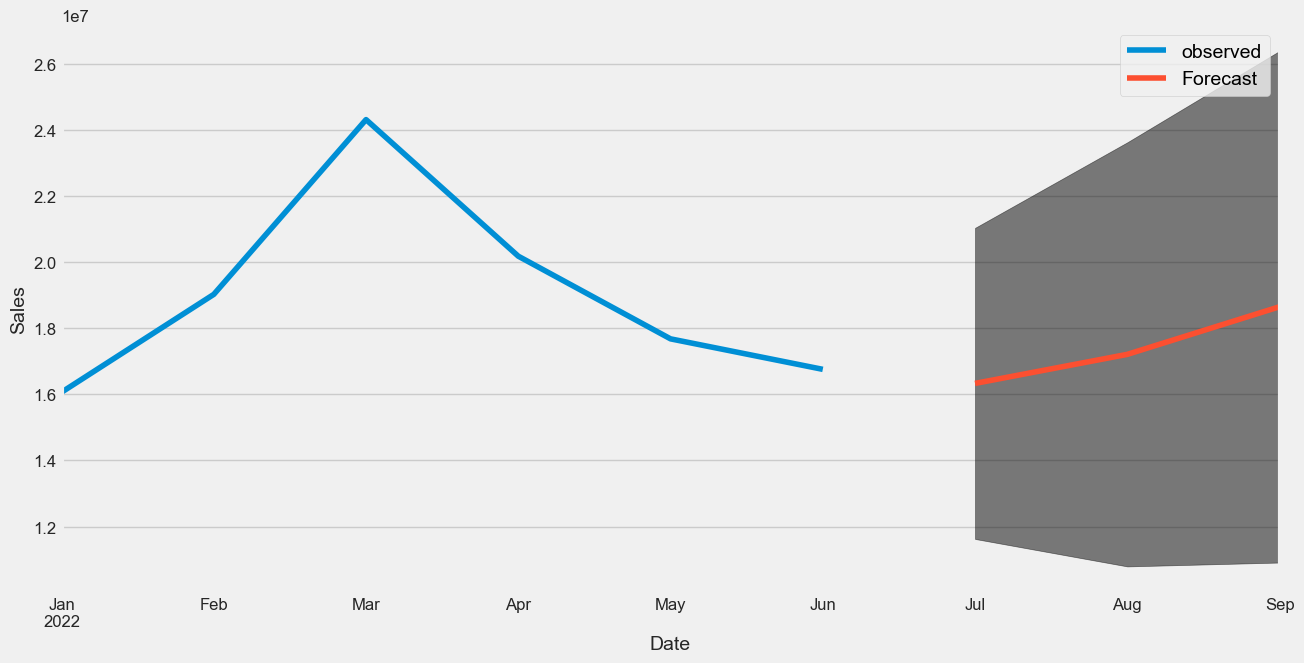

In [134]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()



ax = y['2022'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

## Прогноз на 07 и 08 месяцы 2022г.

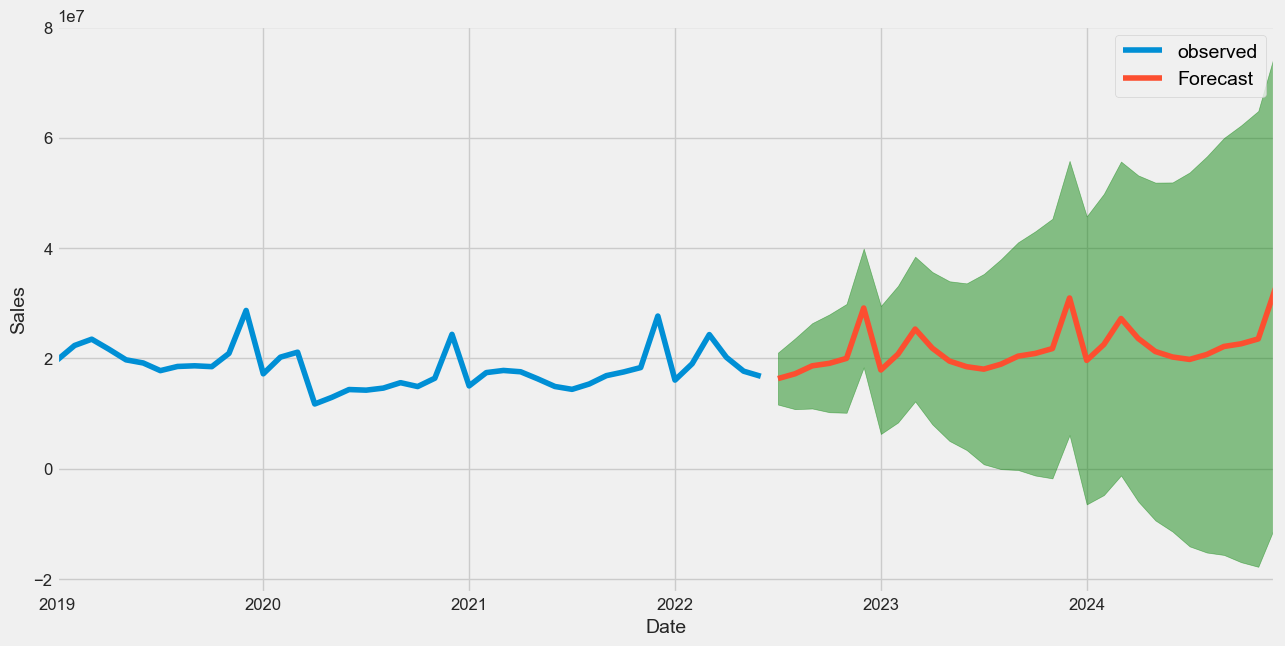

In [129]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.45)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

## Модель показывает сезонность продаж. Поскольку модель предсказывает будущие значения, естественно быть менее уверенным в значениях. Это отражается в доверительных интервалах, сгенерированных моделью, которые увеличиваются для будущих значений.